In [79]:
#Importing necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [64]:
##STEP 1: COLLECTING DATA.
#Loading the data to be used.
mtcars =pd.read_excel("mtcars.xlsx")
print(mtcars.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [73]:
##STEP 2: EXPLORING AND PREPARING THE DATA.
#2. Explore the structure of the data.
mtcars.shape,mtcars.columns
mtcars.drop('Unnamed: 0', axis = 1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21,6,160,110,3,2,16,0,1,4,4
1,21,6,160,110,3,2,17,0,1,4,4
2,22,4,108,93,3,2,18,1,1,4,1
3,21,6,258,110,3,3,19,1,0,3,1
4,18,8,360,175,3,3,17,0,0,3,2
5,18,6,225,105,2,3,20,1,0,3,1
6,14,8,360,245,3,3,15,0,0,3,4
7,24,4,146,62,3,3,20,1,0,4,2
8,22,4,140,95,3,3,22,1,0,4,2
9,19,6,167,123,3,3,18,1,0,4,4


In [48]:
#3. Getting a summary of the data including mean, and any other statistics needed.
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Text(0.5, 1.0, 'MPG vs. CARB')

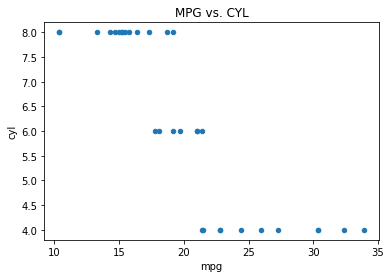

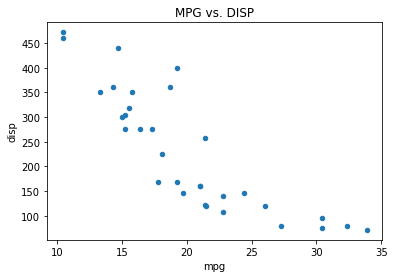

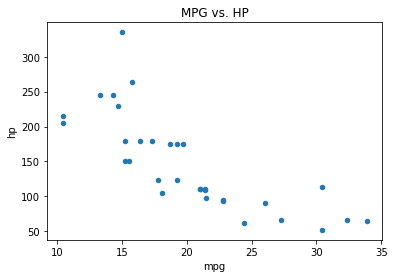

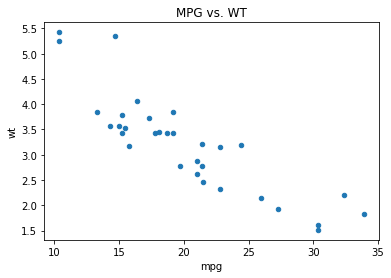

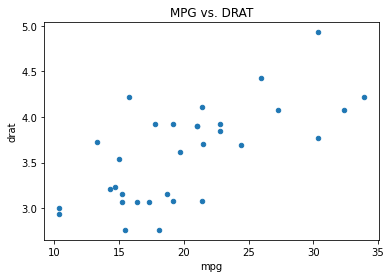

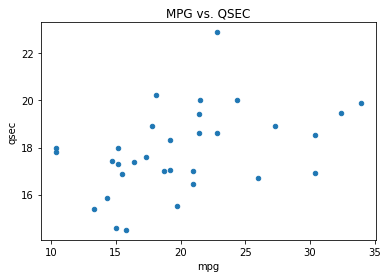

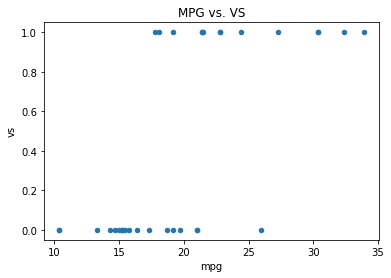

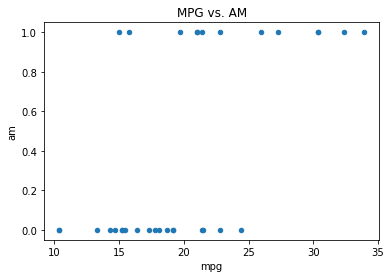

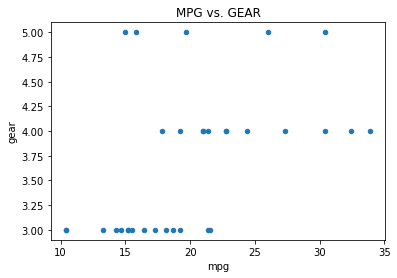

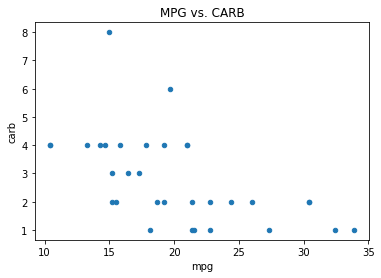

In [34]:
#4. Plotting each of the variables against mpg the response variable.
from matplotlib.pyplot import subplots
#mpg against cyl
ax = mtcars.plot.scatter('mpg', 'cyl');
ax.set_title('MPG vs. CYL')
#mpg against disp
ax = mtcars.plot.scatter('mpg','disp');
ax.set_title('MPG vs. DISP')
#mpg against hp
ax = mtcars.plot.scatter('mpg','hp');
ax.set_title('MPG vs. HP')
#mpg against wt
ax = mtcars.plot.scatter('mpg','wt');
ax.set_title('MPG vs. WT')
#mpg against drat
ax = mtcars.plot.scatter('mpg','drat');
ax.set_title('MPG vs. DRAT')
#mpg against qsec
ax = mtcars.plot.scatter('mpg','qsec');
ax.set_title('MPG vs. QSEC')
#mpg against vs
ax = mtcars.plot.scatter('mpg','vs');
ax.set_title('MPG vs. VS')
#mpg against am
ax = mtcars.plot.scatter('mpg','am');
ax.set_title('MPG vs. AM')
#mpg against gear
ax = mtcars.plot.scatter('mpg','gear');
ax.set_title('MPG vs. GEAR')
# mpg against carb
ax = mtcars.plot.scatter('mpg','carb');
ax.set_title('MPG vs. CARB')

array([[<AxesSubplot:title={'center':'mpg'}>]], dtype=object)

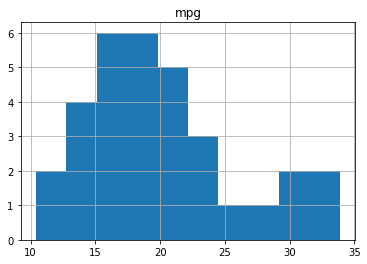

In [10]:
#5. Drawing a histogram on the response variable.
mtcars.hist("mpg")

<AxesSubplot:>

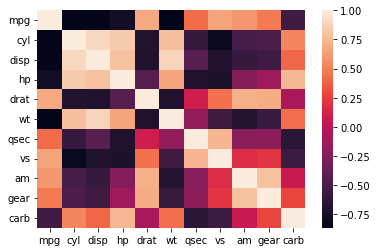

In [41]:
#6. Correlation analysis of the variables
import seaborn as sns
corr_matrix = mtcars.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "" )

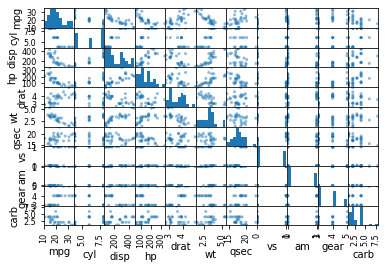

In [37]:
#7. Visualising the relationships using a scatterplot matrix.
pd.plotting.scatter_matrix(mtcars);

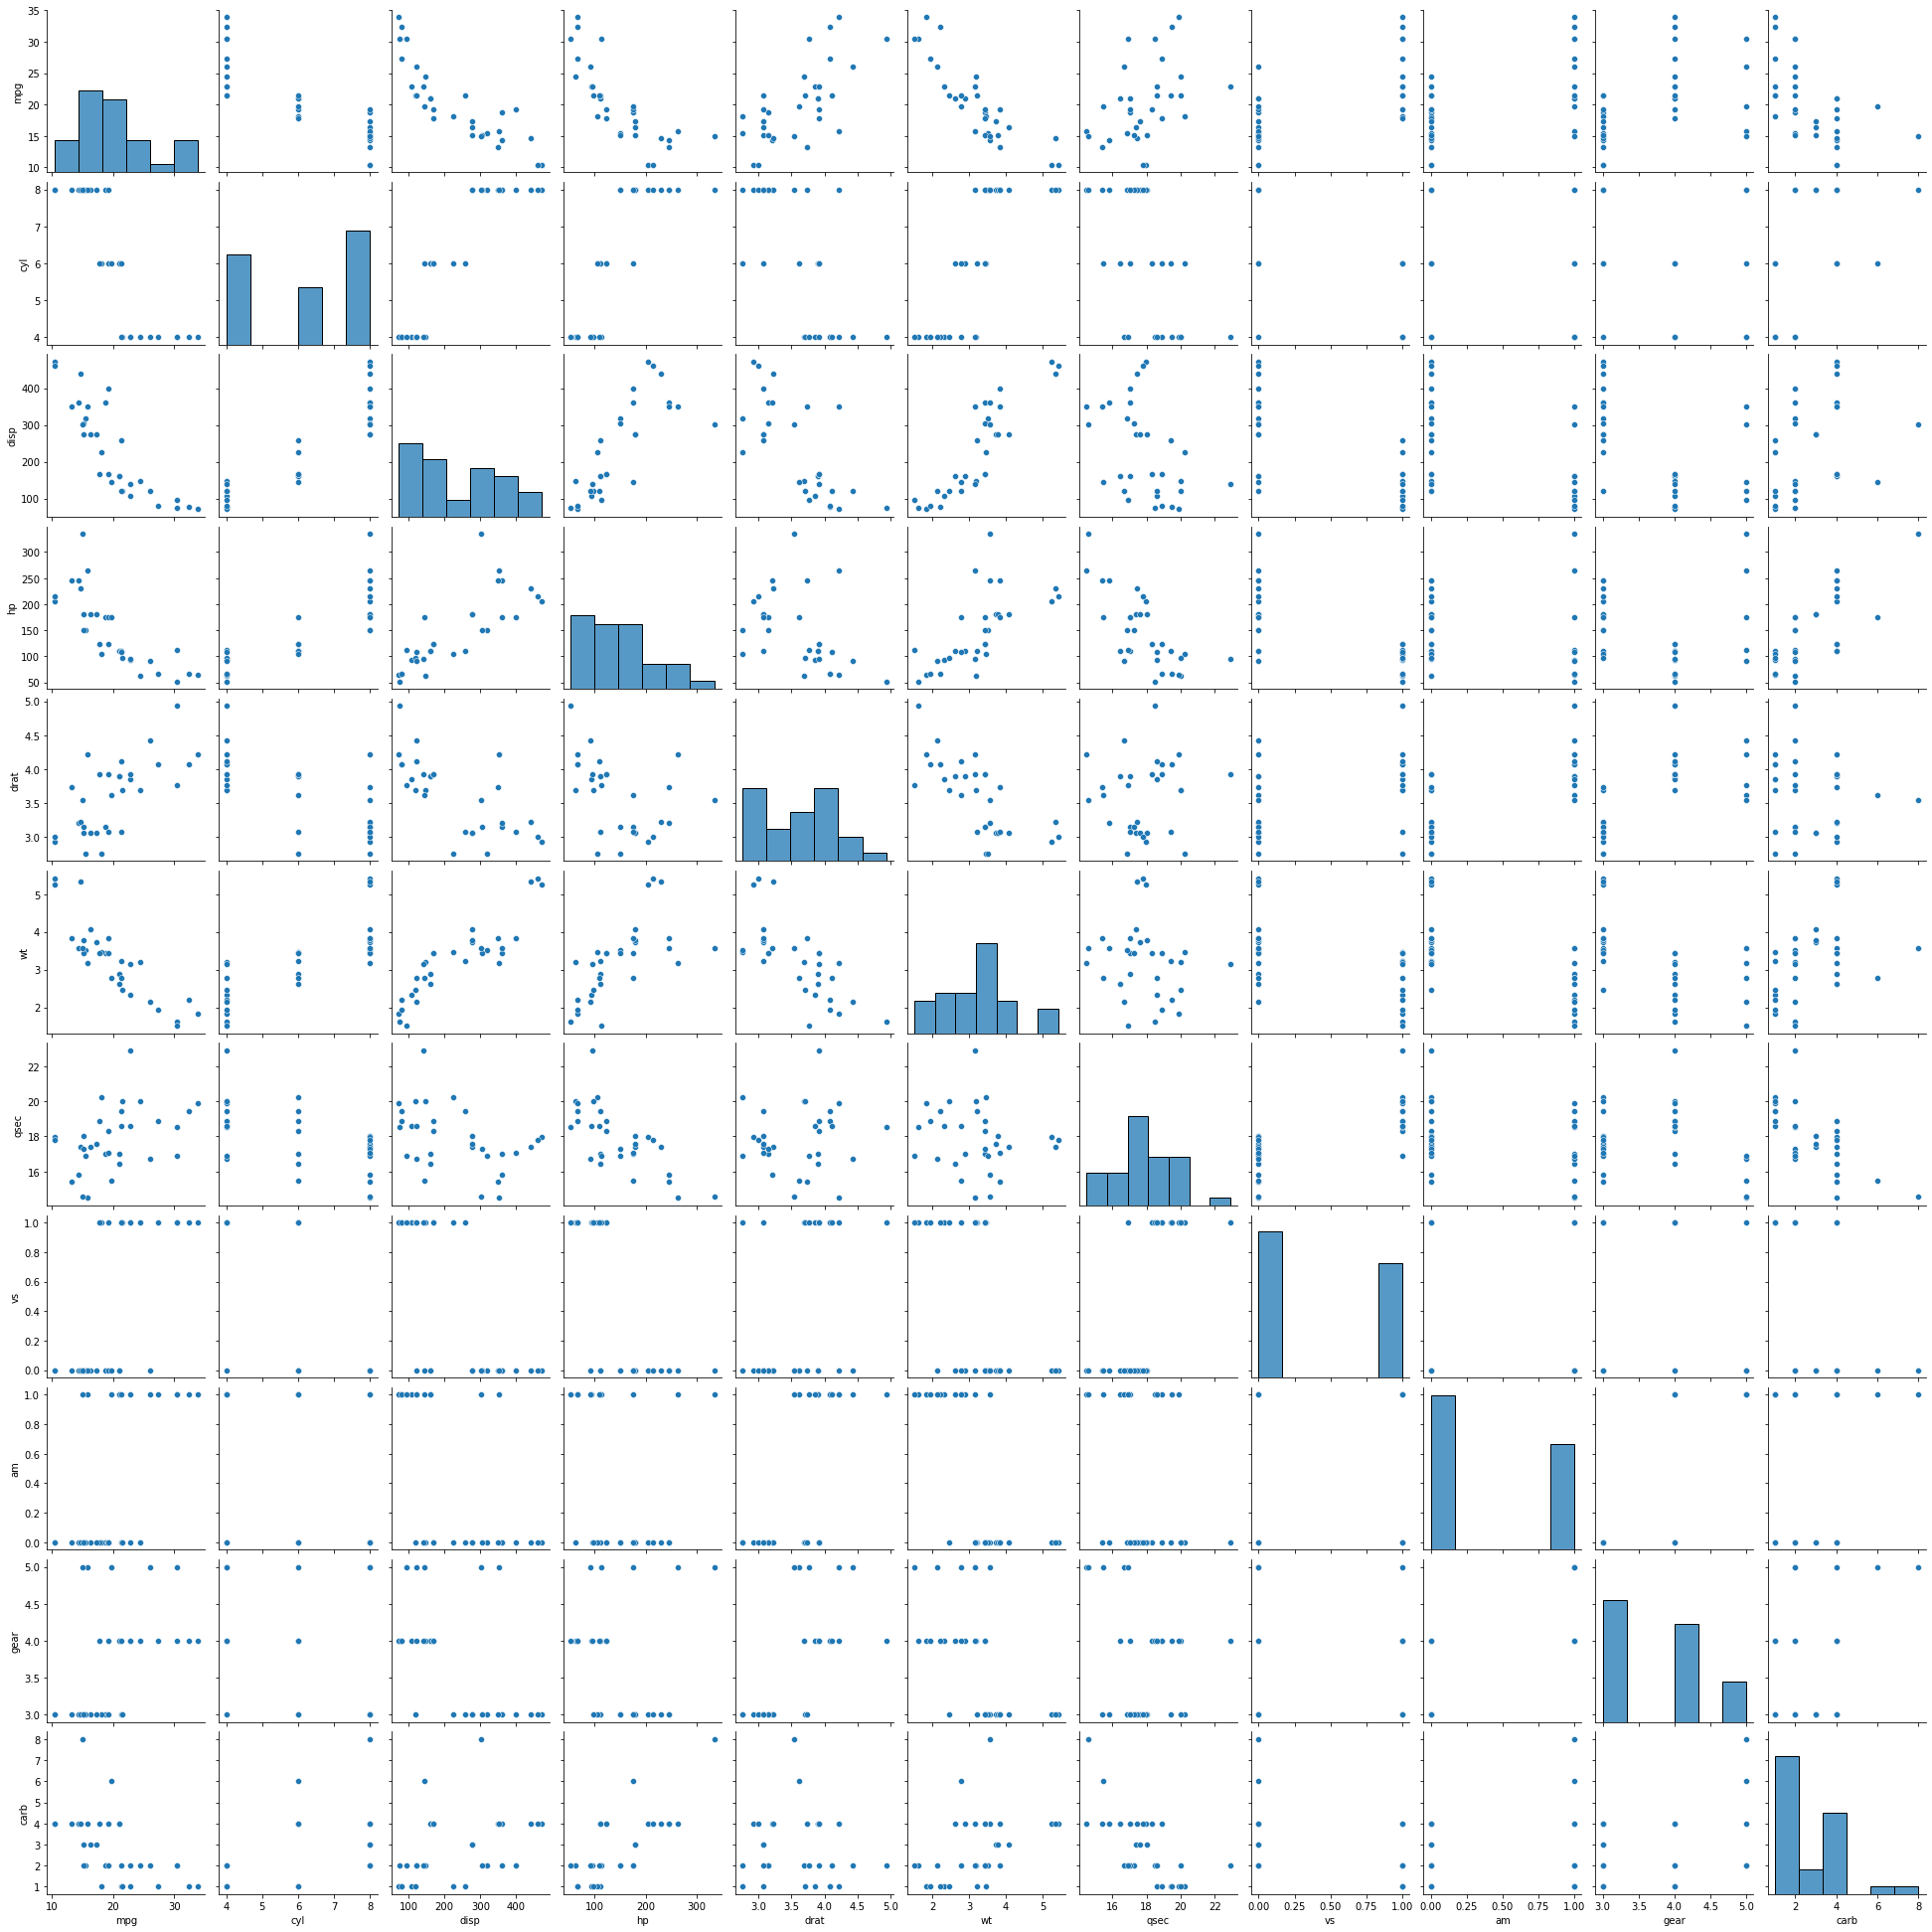

In [45]:
#8. Using equivalent of pairs.panels in r which creates an enhanced scatterplot matrix.
sns.pairplot(mtcars)

In [90]:
##STEP 3:TRAINING THE MODEL

from sklearn.linear_model import LinearRegression

#1. Fit a linear regression model on the data.

#Converting the datatypes from float to integer to carry out regression.
#mtcars['disp'] = mtcars['disp'].astype(int)
#mtcars['drat'] = mtcars['drat'].astype(int)
#mtcars['wt'] = mtcars['wt'].astype(int)
#mtcars['qsec'] = mtcars['qsec'].astype(int)
#mtcars['mpg'] = mtcars['mpg'].astype(int)

x = MS(['cyl','disp','hp', 'drat','wt', 'qsec', 'vs',
        'am', 'gear', 'carb']).fit_transform(mtcars)
y = np.array(mtcars['mpg'].values.tolist())

#using sklearn
regr = LinearRegression()
regr.fit(x,y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#using statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 9.381356311471857
Coefficients: 
 [ 0.         -0.21112736  0.00864814 -0.02615178  1.76809775 -2.35687733
  0.52612269  0.463518    1.28892475  1.51895077 -0.3963709 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.69
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           2.40e-07
Time:                        22:17:32   Log-Likelihood:                -68.961
No. Observations:                  32   AIC:                             159.9
Df Residuals:                      21   BIC:                             176.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std

In [92]:
#2. INTERPRETATION OF MODEL COEFFICIENTS.

# Here, 87.5 % variation in Y can be explained by X. Meaning 87.5% of the variation in 'mpg' is explained by all the other dependent variables that have been regressed against.

# 1. Intercept (9.3814): When all independent variables are zero, the estimated average value of 'mpg' is 9.3814.

# 2  cyl (-0.2111): A one-unit increase in the 'cyl' variable is associated with a decrease of 0.2111 units in 'mpg', holding all other variables constant.

# 3. disp (0.0086): A one-unit increase in 'disp' results in an increase of 0.0086 units in 'mpg', holding all other variables constant.

# 4. hp (-0.0262): A one-unit increase in 'hp' leads to a decrease of 0.0262 units in 'mpg', holding all other variables constant.

# 5. drat (1.7681): A one-unit increase in 'drat' results in an increase of 1.7681 units in 'mpg', holding all other variables constant.

# 6. wt (-2.3569): A one-unit increase in 'wt' leads to a decrease of 2.3569 units in 'mpg', holding all other variables constant.

# 7. qsec (0.5261): A one-unit increase in 'qsec' results in an increase of 0.5261 units in 'mpg', holding all other variables constant.

# 8. vs (0.4635): A one-unit increase in 'vs' leads to an increase of 0.4635 units in 'mpg', holding all other variables constant.

# 9. am (1.2889): A one-unit increase in 'am' results in an increase of 1.2889 units in 'mpg', holding all other variables constant.

# 10.gear (1.5190): A one-unit increase in 'gear' leads to an increase of 1.5190 units in 'mpg', holding all other variables constant.

# 11. carb (-0.3964): A one-unit increase in 'carb' is associated with a decrease of 0.3964 units in 'mpg', holding all other variables constant.

# The p-values associated with each coefficient (P>|t|) indicate the probability of observing the estimated coefficient value if the true coefficient were zero. If the p-value is less than the significance level of 0.05, the corresponding variable is statistically significant.

# In the above model, it appears that the variables 'cyl', 'hp', 'wt', and 'carb' are not statistically significant at the 0.05 level, suggesting that changes in these variables might not have a significant impact on the dependent variable(mpg).

In [93]:
##STEP 4: EVALUATING MODEL PERFORMANCE.
#1. Evaluate model performance by doing summary() of the model.


In [96]:
# STEP 5:Improving model Performance.
# 1. Adding nonlinear relationships to any to variables.


Object `anova_lm` not found.
